<a href="https://colab.research.google.com/github/OUAALOUHOUM/Logistic-Regression/blob/main/logistic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""ce programme permet de classer les aérosoles en utilisant la regression logistique
"""

'ce programme permet de classer les aérosoles en utilisant la regression logistique\n'

In [ ]:
#importer les bibliothèques
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

In [ ]:
#importer les bibliothèques machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score      #pour évaluer mon model
from sklearn.model_selection import train_test_split                    #diviser la base de données en deux partie: train et test

In [ ]:
uploaded=files.upload()

MessageError: ignored

In [ ]:
import io
df= pd.read_excel(io.BytesIO(uploaded['DATA.xlsx']))
df

NameError: ignored

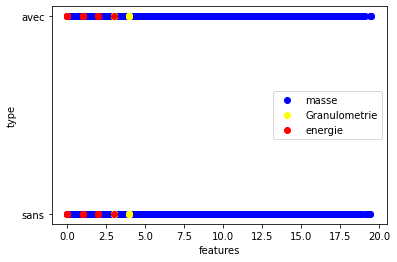

In [ ]:
#tracer chaque caracteristique en fonction du type 
plt.xlabel("features")
plt.ylabel("type")
pltX=df.loc[:,'classe'] 
pltY=df.loc[:,'masse']
plt.scatter(pltY,pltX, color='blue', label='masse')

pltX=df.loc[:,'classe']
pltY=df.loc[:,'granulometrie']
plt.scatter(pltY,pltX, color='yellow', label='Granulometrie')

"""pltX=df.loc[:,'classe'] 
pltY=df.loc[:,'temps']
plt.scatter(pltY,pltX, color='green', label='temps')"""

pltX=df.loc[:,'classe']
pltY=df.loc[:,'energie']
plt.scatter(pltY,pltX, color='red', label='energie')

plt.legend()
plt.show()

In [ ]:
#preparer les données d'entrainement
X=df.iloc[:,1:]
y=df.iloc[:,0]
#diviser la base de données
x_train, x_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(x_train.shape)
print(x_test.shape)

(26212, 1027)
(6554, 1027)


In [ ]:
#creation du model 
model=LogisticRegression()
model.fit(x_train,y_train)



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
#test model
predictions=model.predict(x_test)
print(predictions)
print(y_test)


['sans' 'sans' 'avec' ... 'avec' 'sans' 'avec']
1588     sans
2153     sans
25937    avec
24069    avec
23217    avec
         ... 
23250    avec
8344     sans
22629    avec
7924     sans
30070    avec
Name: classe, Length: 6554, dtype: object


In [ ]:
#evaluation model
print(classification_report(y_test, predictions))
print(accuracy_score(y_test, predictions))


              precision    recall  f1-score   support

        avec       0.96      0.94      0.95      3283
        sans       0.94      0.96      0.95      3271

    accuracy                           0.95      6554
   macro avg       0.95      0.95      0.95      6554
weighted avg       0.95      0.95      0.95      6554

0.9491913335367714
